In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install lightgbm

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Projects/Datahack-Machine Learning in Agriculture/df.csv')

In [ ]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [ ]:
data.drop(['ID'], axis = 1, inplace = True)

In [ ]:
target = data.pop('Crop_Damage')

In [ ]:
len(target)

88693

In [ ]:
np.unique(target, return_counts=True)

(array([0., 1., 2.]), array([74238, 12307,  2148]))

In [ ]:
# train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(int(np.mean(train['Number_Weeks_Used'])))

In [ ]:
target = target.dropna()

In [ ]:
train = data[:len(target)]
test = data[len(target):]

In [ ]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(int(np.mean(train['Number_Weeks_Used'])))
train['NWxNQ'] = train['Number_Doses_Week'] * train['Number_Weeks_Quit']
train['NW/NQ'] = train['Number_Doses_Week'] / (train['Number_Weeks_Quit'] + 1)
train['EIC/NW'] = train['Estimated_Insects_Count'] / (train['Number_Doses_Week'] + 1)
train['NWxNU'] = train['Number_Doses_Week'] * train['Number_Weeks_Used']
train['NW/NU'] = train['Number_Doses_Week'] / (train['Number_Weeks_Used'] + 1)
train['EIC/NU'] = train['Estimated_Insects_Count'] / (train['Number_Weeks_Used'] + 1)
train['EIC/NQ'] = train['Estimated_Insects_Count'] / (train['Number_Weeks_Quit'] + 1)

In [ ]:
train.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'NWxNQ', 'NW/NQ', 'EIC/NW', 'NWxNU',
       'NW/NU', 'EIC/NU', 'EIC/NQ'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, stratify = target, random_state = 123)

In [ ]:
from lightgbm import LGBMClassifier
# from sklearn.ensemble import 

model = LGBMClassifier(n_estimators=90)

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

In [ ]:
scores.mean()

0.8484174921478618

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, preds)

0.8489176187612748

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE({1:10000, 2:5000})

new_train, new_target = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(new_target, return_counts=True)

(array([0., 1., 2.]), array([51966, 10000,  5000]))

In [ ]:
model = LGBMClassifier(n_estimators=90, class_weight={0:0.25, 1:0.4, 2:0.35})

In [ ]:
model.fit(new_train, new_target)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.25, 1: 0.4, 2: 0.35},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=90, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
preds = model.predict(X_val)

In [ ]:
accuracy_score(y_val, preds)

0.8436184606133493

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
smote = SMOTE(sampling_strategy={1:10000, 2:10000})
under_sample = RandomUnderSampler(sampling_strategy={0:45000})

steps = [('o', smote), ('u', under_sample)]
pipeline = Pipeline(steps=steps)

new_train, new_target = pipeline.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model.fit(new_train, new_target)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds = model.predict(X_val)

In [ ]:
accuracy_score(y_val, preds)

0.8473767288033675

[[21927   344     1]
 [ 3026   665     1]
 [  471   171     2]]


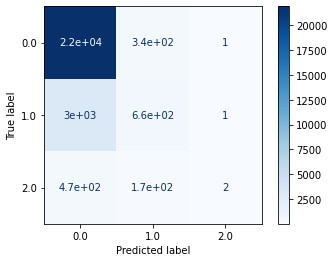

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, X_val, y_val,
                             cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.show()

In [ ]:
np.unique(y_val, return_counts = True)

(array([0., 1., 2.]), array([22272,  3692,   644]))

In [ ]:
np.unique(y_train, return_counts = True)

(array([0., 1., 2.]), array([51966,  8615,  1504]))

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Projects/Datahack-Machine Learning in Agriculture/train.csv')

In [ ]:
target = train['Crop_Damage']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

train_x, val_x = train_test_split(train, test_size = 0.3, stratify = target, random_state = 123)

In [ ]:
# making first classification, non_damaged and damaged

In [ ]:
train_x.reset_index(drop=True, inplace=True)

In [ ]:
first_class = []

for i in range(len(train_x)):
  if train_x['Crop_Damage'][i] == 0:
    first_class.append(0)
  else:
    first_class.append(1)

In [ ]:
train_x.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00068941,1785,0,0,2,20,26.0,22,3,0
1,F00114303,915,0,1,2,30,33.0,3,2,0
2,F00154910,1898,0,1,2,20,45.0,2,3,0
3,F00042789,625,0,1,2,30,16.0,14,2,0
4,F00048642,984,1,0,2,5,18.0,20,1,0
5,F00056929,1898,0,1,2,20,31.0,18,1,0
6,F00102738,448,0,1,3,45,NaN,0,3,0
7,F00104546,1678,0,0,2,50,NaN,13,3,0
8,F00085240,1385,0,0,3,30,NaN,0,1,0
9,F00006104,984,0,0,2,35,42.0,3,1,0


In [ ]:
first_class[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
train_x_Ids_first_class = train_x['ID']

In [ ]:
train_x['first_class'] = first_class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_x.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,first_class
0,F00068941,1785,0,0,2,20,26.0,22,3,0,0
1,F00114303,915,0,1,2,30,33.0,3,2,0,0
2,F00154910,1898,0,1,2,20,45.0,2,3,0,0
3,F00042789,625,0,1,2,30,16.0,14,2,0,0
4,F00048642,984,1,0,2,5,18.0,20,1,0,0
5,F00056929,1898,0,1,2,20,31.0,18,1,0,0
6,F00102738,448,0,1,3,45,NaN,0,3,0,0
7,F00104546,1678,0,0,2,50,NaN,13,3,0,0
8,F00085240,1385,0,0,3,30,NaN,0,1,0,0
9,F00006104,984,0,0,2,35,42.0,3,1,0,0


In [ ]:
second_class_train = train_x.loc[train_x['first_class'] == 1]

In [ ]:
second_class_train['Crop_Damage'].value_counts()

1    8615
2    1619
Name: Crop_Damage, dtype: int64

In [ ]:
second_class = second_class_train.pop('Crop_Damage')

In [ ]:
train_x_Ids_second_class = second_class_train['ID']

In [ ]:
train_x.drop(['ID', 'Crop_Damage', 'first_class'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,1785,0,0,2,20,26.0,22,3
1,915,0,1,2,30,33.0,3,2
2,1898,0,1,2,20,45.0,2,3
3,625,0,1,2,30,16.0,14,2
4,984,1,0,2,5,18.0,20,1


In [ ]:
from lightgbm import LGBMClassifier
# from sklearn.ensemble import 

model_1 = LGBMClassifier(n_estimators=90, class_weight='balanced')

scores = cross_val_score(model_1, train_x, first_class, cv = 5, scoring = 'roc_auc')

In [ ]:
scores

array([0.81217583, 0.80331398, 0.80708869, 0.81612974, 0.80614672])

In [ ]:
np.unique(first_class, return_counts=True)

(array([0, 1]), array([51966, 10234]))

In [ ]:
second_class_train.drop(['ID', 'first_class'], axis = 1, inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
np.unique(second_class, return_counts=True)

(array([1, 2]), array([8615, 1619]))

In [ ]:
from xgboost import XGBClassifier


model_2 = XGBClassifier()

scores = cross_val_score(model_2, second_class_train, second_class, cv = 5, scoring = 'accuracy')

In [ ]:
scores

array([0.84171959, 0.84171959, 0.84171959, 0.84171959, 0.84213099])

In [ ]:
val_x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
37364,F00065681,1478,0,1,2,50,23.0,22,2,0.0
17263,F00030435,2267,0,1,2,20,48.0,8,1,2.0
47718,F00083818,1786,0,1,2,20,26.0,23,2,1.0
21875,F00038531,851,0,1,2,40,25.0,19,3,0.0
13583,F00023855,789,0,0,2,30,20.0,19,1,0.0


In [ ]:
val_x_ids = val_x.pop('ID')

In [ ]:
y_true = val_x.pop('Crop_Damage')

In [ ]:
val_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
37364,1478,0,1,2,50,23.0,22,2
17263,2267,0,1,2,20,48.0,8,1
47718,1786,0,1,2,20,26.0,23,2
21875,851,0,1,2,40,25.0,19,3
13583,789,0,0,2,30,20.0,19,1


In [ ]:
model_1 = LGBMClassifier(n_estimators=90)

model_1.fit(train_x, first_class)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
first_class_preds = model_1.predict(val_x)

In [ ]:
val_x['first_class_preds'] = first_class_preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
val_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,first_class_preds
37364,1478,0,1,2,50,23.0,22,2,0
17263,2267,0,1,2,20,48.0,8,1,0
47718,1786,0,1,2,20,26.0,23,2,0
21875,851,0,1,2,40,25.0,19,3,0
13583,789,0,0,2,30,20.0,19,1,0


In [ ]:
np.unique(first_class_preds,return_counts = True)

(array([0, 1]), array([24891,  1717]))

In [ ]:
np.unique(y_true,return_counts = True)

(array([0., 1., 2.]), array([22272,  3692,   644]))

In [ ]:
val_x['ID'] = val_x_ids

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
second_class_val = val_x.loc[val_x['first_class_preds'] == 1]

In [ ]:
second_class_val.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,first_class_preds,ID
30706,2015,0,1,3,20,51.0,0,3,1,F00054016
38699,1385,1,0,3,20,35.0,0,2,1,F00067970
41356,2016,1,0,3,20,49.0,0,1,1,F00072639
2918,3165,0,0,3,20,60.0,0,2,1,F00005172
54651,3515,0,0,2,40,58.0,5,2,1,F00096070


In [ ]:
second_class_val_ids = second_class_val.pop('ID')

In [ ]:
second_class_val.drop('first_class_preds', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
second_class_val.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
30706,2015,0,1,3,20,51.0,0,3
38699,1385,1,0,3,20,35.0,0,2
41356,2016,1,0,3,20,49.0,0,1
2918,3165,0,0,3,20,60.0,0,2
54651,3515,0,0,2,40,58.0,5,2


In [ ]:
second_class_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
8,1478,0,0,2,30,20.0,3,2
12,789,0,1,3,60,35.0,0,1
29,2402,0,0,3,10,45.0,0,1
55,790,0,1,3,10,30.0,0,1
57,1678,1,1,3,75,47.0,0,2


In [ ]:
model_2 = LGBMClassifier(n_estimators=90)

model_2.fit(second_class_train, second_class)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
second_class_preds = model_2.predict(second_class_val)

In [ ]:
np.unique(second_class_preds,return_counts = True)

(array([1., 2.]), array([1714,    3]))

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Projects/Datahack-Machine Learning in Agriculture/train.csv')
test = pd.read_csv('/content/drive/My Drive/Projects/Datahack-Machine Learning in Agriculture/test.csv')

In [ ]:
data = pd.concat([train, test]).reset_index(drop = True)

In [ ]:
# data.drop(['ID'], axis = 1,inplace = True)

In [ ]:
data['Number_Weeks_Used'] = imputer.fit_transform(np.array(data['Number_Weeks_Used']).reshape(-1,1)).flatten()

In [ ]:
cat_cols = ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

In [ ]:
for col in cat_cols:

    x = train.groupby(col)['Crop_Damage'].mean()
    data[col] = data[col].map(x)

In [ ]:
target = data.pop('Crop_Damage')

In [ ]:
target = target.dropna()

In [ ]:
np.unique(target, return_counts=True)

(array([0., 1., 2.]), array([74238, 12307,  2313]))

In [ ]:
train = data[:len(target)]
test = data[len(target):]

In [ ]:
smote = SMOTE({2:5000})

In [ ]:
train.drop(['ID'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# new_train, new_target = smote.fit_resample(train, target)

In [ ]:
np.unique(new_target, return_counts = True)

(array([0., 1., 2.]), array([74238, 37119, 18559]))

In [ ]:
model = LGBMClassifier(n_estimators=90)

model.fit(train, target)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model_1 = XGBClassifier(n_estimators = 120, max_depth = 6)

model_1.fit(train, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from catboost import CatBoostClassifier

model_2 = CatBoostClassifier(n_estimators = 100)

model_2.fit(train, target)

Learning rate set to 0.5
0:	learn: 0.6414395	total: 98ms	remaining: 9.7s
1:	learn: 0.5310989	total: 144ms	remaining: 7.04s
2:	learn: 0.4790626	total: 195ms	remaining: 6.32s
3:	learn: 0.4564493	total: 241ms	remaining: 5.79s
4:	learn: 0.4432456	total: 289ms	remaining: 5.5s
5:	learn: 0.4385195	total: 344ms	remaining: 5.39s
6:	learn: 0.4330928	total: 390ms	remaining: 5.18s
7:	learn: 0.4308606	total: 440ms	remaining: 5.06s
8:	learn: 0.4280929	total: 492ms	remaining: 4.97s
9:	learn: 0.4265543	total: 541ms	remaining: 4.87s
10:	learn: 0.4252933	total: 589ms	remaining: 4.76s
11:	learn: 0.4237274	total: 635ms	remaining: 4.65s
12:	learn: 0.4233493	total: 684ms	remaining: 4.58s
13:	learn: 0.4224579	total: 731ms	remaining: 4.49s
14:	learn: 0.4218394	total: 784ms	remaining: 4.44s
15:	learn: 0.4214503	total: 829ms	remaining: 4.35s
16:	learn: 0.4208983	total: 877ms	remaining: 4.28s
17:	learn: 0.4207830	total: 926ms	remaining: 4.22s
18:	learn: 0.4205604	total: 971ms	remaining: 4.14s
19:	learn: 0.419373

In [ ]:
sub = pd.read_csv('/content/drive/My Drive/Projects/Datahack-Machine Learning in Agriculture/sample_submission.csv')

In [ ]:
len(sub)

59310

In [ ]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
88858,F00093541,1576,1,0,2,25,23.000000,15,2
88859,F00093542,1678,1,0,2,5,35.000000,6,1
88860,F00093543,1678,1,0,2,10,14.000000,15,2
88861,F00093544,1678,1,0,2,10,19.000000,22,1
88862,F00093546,1678,1,0,2,15,11.000000,24,2
...,...,...,...,...,...,...,...,...,...
148163,F00155941,3702,1,0,2,10,28.656485,48,1
148164,F00155942,3702,1,0,2,10,25.000000,18,3
148165,F00155943,3702,1,0,2,10,28.000000,17,2
148166,F00155944,3895,1,0,2,5,52.000000,7,1


In [ ]:
test_new = pd.merge(sub, test, on = 'ID')

In [ ]:
len(test_new)

59310

In [ ]:
test_new.drop(['ID'],axis = 1, inplace = True)

In [ ]:
test_new.drop(['Crop_Damage'], axis = 1, inplace = True)

In [ ]:
preds = model.predict_proba(test_new)
preds_1 = model_1.predict_proba(test_new)
preds_2 = model_2.predict_proba(test_new)

In [ ]:
predictions = list()
lb_weight=0.4 # LGBM1
xb_weight=0.4 # XGB
cb_weight=0.2 # CB
for i, j, k in zip(preds, preds_1, preds_2):
    xx = [(lb_weight * i[0]) + (xb_weight * j[0]) + (cb_weight * k[0]),
          (lb_weight * i[1]) + (xb_weight * j[1]) + (cb_weight * k[1]),
          (lb_weight * i[2]) + (xb_weight * j[2]) + (cb_weight * k[2])]
    predictions.append(xx)
# print(predictions[:10])
preds_ensemble=np.argmax(predictions,axis=1)

In [ ]:
len(preds_ensemble)

59310

In [ ]:
sub['Crop_Damage'] = preds_ensemble

In [ ]:
sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [ ]:
preds

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
sub.to_csv('random.csv', index = False)

In [ ]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000002,188,1,1,1,0,NaN,0,2,0.0
2,F00000003,209,1,0,1,0,0.0,0,2,1.0
3,F00000004,257,1,0,1,0,0.0,0,2,1.0
4,F00000005,257,1,1,1,0,0.0,0,2,1.0


In [ ]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors = 3)

In [ ]:
data['Crop_Damage'] = imputer.fit_transform(np.array(data['Crop_Damage']).reshape(-1,1)).flatten()

In [ ]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.000000
1,F00000002,188,1,1,1,0,NaN,0,2,0.190562
2,F00000003,209,1,0,1,0,0.0,0,2,1.000000
3,F00000004,257,1,0,1,0,0.0,0,2,1.000000
4,F00000005,257,1,1,1,0,0.0,0,2,1.000000


In [ ]:
sub_new = pd.merge(sub,data, on='ID')

In [ ]:
sub_new.head()

,ID,Crop_Damage_x,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage_y
0,F00000002,1.0,188,1,1,1,0,NaN,0,2,0.0
1,F00000011,1.0,626,1,0,1,0,0.0,0,2,2.0
2,F00000014,1.0,789,0,0,1,0,0.0,0,1,0.0
3,F00000015,1.0,851,0,1,1,0,0.0,0,2,0.0
4,F00000016,1.0,851,1,0,1,0,NaN,0,3,0.0


In [ ]:
sub['Crop_Damage'] = sub_new['Crop_Damage_y']

In [ ]:
import math

In [ ]:
math.isnan(data['Crop_Damage'][1])

True

In [ ]:
for i in range(len(data)):
  if math.isnan(data['Crop_Damage'][i]):
    data['Crop_Damage'][i] = data['Crop_Damage'][i-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000002,188,1,1,1,0,NaN,0,2,0.0
2,F00000003,209,1,0,1,0,0.0,0,2,1.0
3,F00000004,257,1,0,1,0,0.0,0,2,1.0
4,F00000005,257,1,1,1,0,0.0,0,2,1.0
